# Evaluate Translations

In [1]:
_DATASETS = [
    "xnli",
    "xstory_cloze",
    "mgsm",
    "xcopa",
    "paws-x",
]

_MODELS = [
    "nllb-200-distilled-600M",
    "nllb-200-distilled-1.3B",
    "nllb-200-1.3B",
    "nllb-200-3.3B",
    "xglm-564M",
    "xglm-1.7B",
    "xglm-2.9B",
    #"xglm-4.5B",
    "xglm-7.5B",
    "bloom-560m",
    #"bloom-1b1",
    "bloom-1b7",
    "bloom-3b",
    "bloom-7b1",
    "llama-7B",
    "llama-13B",
    "llama-30B",
    # "llama-65B",
    #"RedPajama-INCITE-Base-3B-v1",
    #"RedPajama-INCITE-7B-Base",
    #"open_llama_3b",
    #"open_llama_7b",
    #"open_llama_13b",
]

In [2]:
# Get results from metrics folder

from collections import defaultdict
import json

def get_metrics():
    metrics_dict = defaultdict(dict)
    for dataset_name in _DATASETS:
        for model_name in _MODELS:
            if model_name == "bloom-560m" and dataset_name == "xnli":
                continue
            with open(f"metrics/{dataset_name}/{model_name}.json") as f:
                metrics_dict[dataset_name][model_name] = json.load(f)
            for language in metrics_dict[dataset_name][model_name]:
                avg = defaultdict(float)
                for field in metrics_dict[dataset_name][model_name][language]:
                    for metric, value in metrics_dict[dataset_name][model_name][language][field].items():
                        avg[metric] += value
                for metric in avg:
                    avg[metric] /= len(metrics_dict[dataset_name][model_name][language])
                    avg[metric] = round(avg[metric], 2)
                metrics_dict[dataset_name][model_name][language]["avg"] = dict(avg)
                        
                
    return dict(metrics_dict)
                
metrics_dict = get_metrics()

In [3]:
metrics_dict_split = defaultdict(dict)
from copy import deepcopy

for metric in ["sacrebleu", "chrf++", "comet"]:
    metrics_dict_split[metric] = deepcopy(metrics_dict)
    for dataset_name in metrics_dict:
        for model_name in metrics_dict[dataset_name]:
            if model_name == "bloom-560m" and dataset_name == "xnli":
                continue
            for language, language_dict in metrics_dict[dataset_name][model_name].items():
                avg = metrics_dict[dataset_name][model_name][language]["avg"]
                metrics_dict_split[metric][dataset_name][model_name][language] = avg.get(metric, 0)
            metrics_dict_split[metric][dataset_name][model_name]["avg"] = round(sum(metrics_dict_split[metric][dataset_name][model_name].values()) / len(metrics_dict_split[metric][dataset_name][model_name]), 2)


,ar,bg,de,el,es,fr,hi,ru,sw,th,tr,ur,vi,zh,avg
nllb-200-distilled-600M,37.99,41.39,44.65,46.13,50.92,45.09,38.09,31.41,34.09,28.16,36.28,30.61,39.10,27.71,37.97
nllb-200-distilled-1.3B,41.09,43.80,46.97,48.54,53.02,47.17,40.78,33.49,36.30,30.00,39.24,32.84,41.81,29.48,40.32
nllb-200-1.3B,40.56,43.62,46.69,48.37,53.05,46.81,40.40,33.36,36.45,29.90,39.00,32.28,41.41,29.52,40.10
nllb-200-3.3B,42.19,45.08,47.66,50.05,53.80,47.73,41.73,33.98,37.89,31.35,40.61,33.86,43.20,31.31,41.46
xglm-564M,5.54,17.83,19.91,14.67,17.56,20.52,5.91,12.07,4.97,7.25,4.38,4.50,8.85,1.67,10.40
xglm-1.7B,16.34,27.20,30.30,30.86,31.54,29.73,12.77,18.83,16.63,15.23,11.78,9.81,21.11,12.36,20.32
xglm-2.9B,19.63,30.91,34.54,35.14,34.76,32.98,17.96,22.45,20.83,17.68,15.09,13.58,24.71,16.84,24.08
xglm-7.5B,26.52,35.23,38.80,39.16,41.56,38.93,22.09,25.91,26.29,22.56,19.71,17.61,29.08,19.80,28.80
bloom-1b7,21.61,3.34,16.19,2.71,37.73,36.64,15.36,8.77,10.58,1.07,1.21,10.26,26.12,16.82,14.89
bloom-3b,24.10,4.43,19.05,4.42,40.60,38.84,17.61,11.22,15.99,1.48,1.35,12.46,28.96,19.12,17.12


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &     ar &     bg &     de &     el &     es &     fr &     hi &     ru &     sw &     th &     tr &     ur &     vi &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  37.99 &  41.39 &  44.65 &  46.13 &  50.92 &  45.09 &  38.09 &  31.41 &  34.09 &  28.16 &  36.28 &  30.61 &  39.10 &  27.71 &  37.97 \\
nllb-200-distilled-1.3B &  41.09 &  43.80 &  46.97 &  48.54 &  53.02 &  47.17 &  40.78 &  33.49 &  36.30 &  30.00 &  39.24 &  32.84 &  41.81 &  29.48 &  40.32 \\
nllb-200-1.3B           &  40.56 &  43.62 &  46.69 &  48.37 &  53.05 &  46.81 &  40.40 &  33.36 &  36.45 &  29.90 &  39.00 &  32.28 &  41.41 &  29.52 &  40.10 \\
nllb-200-3.3B           &  42.19 &  45.08 &  47.66 &  50.05 &  53.80 &  47.73 &  41.73 &  33.98 &  37.89 &  31.35 &  40.61 &  33.86 &  43.20 &  31.31 &  41.46 \\
xglm-564M               &   5.54 &  17.83 &  19.91 &  14.67 &  17.56 &  20.52 &   5.91 &  12.07 &   4.97 &   7.25 &   4.38 &   4.50 &   8.85 &   1.67 &  10.40 

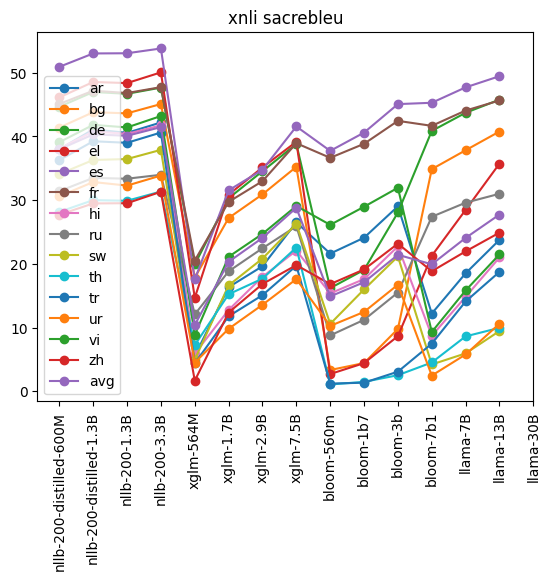

,ru,zh,es,ar,hi,id,te,sw,eu,my,avg
nllb-200-distilled-600M,40.98,30.04,47.98,49.46,45.07,38.44,29.45,41.51,35.24,22.00,38.02
nllb-200-distilled-1.3B,44.12,30.57,50.52,53.09,48.62,40.98,32.19,43.86,33.77,28.18,40.59
nllb-200-1.3B,43.22,32.07,50.42,52.91,48.08,41.13,31.39,44.17,35.63,29.94,40.90
nllb-200-3.3B,44.59,34.80,51.33,54.80,49.16,42.27,33.09,45.00,33.55,29.69,41.83
xglm-564M,15.67,1.54,14.36,6.16,7.52,16.92,1.28,3.82,2.81,0.67,7.08
xglm-1.7B,25.62,16.08,28.64,21.40,16.22,26.07,10.46,21.17,11.38,7.94,18.50
xglm-2.9B,29.08,21.68,36.22,26.32,24.91,28.86,11.37,27.19,20.04,12.40,23.81
xglm-7.5B,34.40,25.20,40.85,34.45,30.32,33.59,17.05,33.48,23.33,16.84,28.95
bloom-560m,0.37,9.67,20.55,14.70,9.94,19.55,1.93,0.43,1.96,0.11,7.92
bloom-1b7,9.03,22.26,35.84,26.14,18.45,27.74,9.01,12.67,11.56,0.06,17.28


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     ru &     zh &     es &     ar &     hi &     id &     te &     sw &     eu &     my &    avg \\
\midrule
nllb-200-distilled-600M &  40.98 &  30.04 &  47.98 &  49.46 &  45.07 &  38.44 &  29.45 &  41.51 &  35.24 &  22.00 &  38.02 \\
nllb-200-distilled-1.3B &  44.12 &  30.57 &  50.52 &  53.09 &  48.62 &  40.98 &  32.19 &  43.86 &  33.77 &  28.18 &  40.59 \\
nllb-200-1.3B           &  43.22 &  32.07 &  50.42 &  52.91 &  48.08 &  41.13 &  31.39 &  44.17 &  35.63 &  29.94 &  40.90 \\
nllb-200-3.3B           &  44.59 &  34.80 &  51.33 &  54.80 &  49.16 &  42.27 &  33.09 &  45.00 &  33.55 &  29.69 &  41.83 \\
xglm-564M               &  15.67 &   1.54 &  14.36 &   6.16 &   7.52 &  16.92 &   1.28 &   3.82 &   2.81 &   0.67 &   7.08 \\
xglm-1.7B               &  25.62 &  16.08 &  28.64 &  21.40 &  16.22 &  26.07 &  10.46 &  21.17 &  11.38 &   7.94 &  18.50 \\
xglm-2.9B               &  29.08 &  21.68 &  36.22 &  26.32 &  24.91 &  28.86 &  11.37 &  2

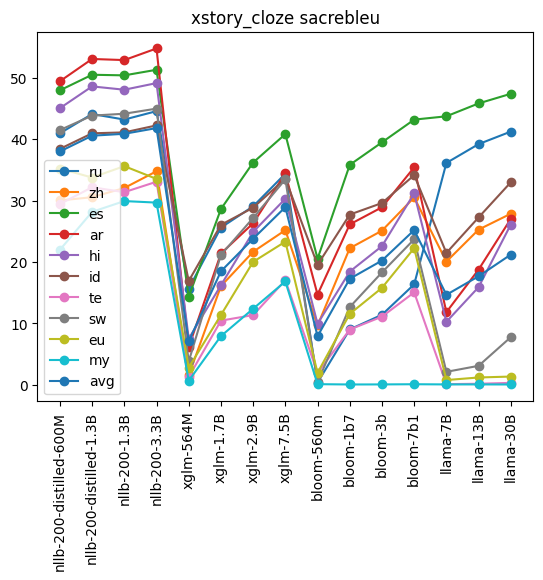

,es,fr,de,ru,zh,ja,th,sw,bn,te,avg
nllb-200-distilled-600M,48.34,34.85,44.57,31.39,28.14,17.99,17.37,34.62,28.58,34.68,32.05
nllb-200-distilled-1.3B,57.94,44.44,54.21,45.11,33.23,29.69,19.62,46.91,40.80,41.54,41.35
nllb-200-1.3B,56.78,44.00,52.64,42.11,33.91,33.51,19.83,47.51,39.82,38.45,40.86
nllb-200-3.3B,57.91,44.26,53.41,44.85,38.44,35.59,24.30,51.37,42.89,44.02,43.70
xglm-564M,12.94,11.30,15.94,7.53,1.77,0.82,1.22,1.27,0.77,0.60,5.42
xglm-1.7B,36.77,24.31,33.33,23.89,8.26,6.14,9.32,16.76,5.43,6.50,17.07
xglm-2.9B,44.50,32.70,40.77,33.20,13.25,14.41,10.71,24.70,11.80,9.28,23.53
xglm-7.5B,45.04,33.37,41.55,34.70,20.75,20.09,18.44,31.32,19.11,18.63,28.30
bloom-560m,19.40,13.29,4.75,0.38,7.83,1.14,0.06,0.67,4.33,1.97,5.38
bloom-1b7,28.14,25.34,17.91,9.39,15.72,5.40,0.14,7.56,9.10,7.23,12.59


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     es &     fr &     de &     ru &     zh &     ja &     th &     sw &     bn &     te &    avg \\
\midrule
nllb-200-distilled-600M &  48.34 &  34.85 &  44.57 &  31.39 &  28.14 &  17.99 &  17.37 &  34.62 &  28.58 &  34.68 &  32.05 \\
nllb-200-distilled-1.3B &  57.94 &  44.44 &  54.21 &  45.11 &  33.23 &  29.69 &  19.62 &  46.91 &  40.80 &  41.54 &  41.35 \\
nllb-200-1.3B           &  56.78 &  44.00 &  52.64 &  42.11 &  33.91 &  33.51 &  19.83 &  47.51 &  39.82 &  38.45 &  40.86 \\
nllb-200-3.3B           &  57.91 &  44.26 &  53.41 &  44.85 &  38.44 &  35.59 &  24.30 &  51.37 &  42.89 &  44.02 &  43.70 \\
xglm-564M               &  12.94 &  11.30 &  15.94 &   7.53 &   1.77 &   0.82 &   1.22 &   1.27 &   0.77 &   0.60 &   5.42 \\
xglm-1.7B               &  36.77 &  24.31 &  33.33 &  23.89 &   8.26 &   6.14 &   9.32 &  16.76 &   5.43 &   6.50 &  17.07 \\
xglm-2.9B               &  44.50 &  32.70 &  40.77 &  33.20 &  13.25 &  14.41 &  10.71 &  2

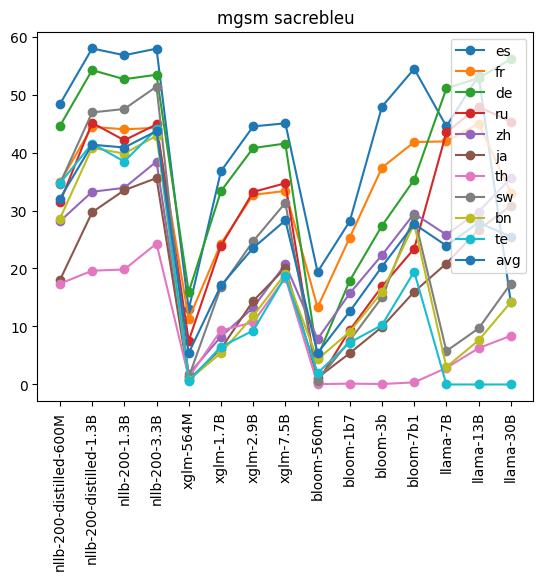

,et,ht,it,id,qu,sw,zh,ta,th,tr,vi,avg
nllb-200-distilled-600M,39.07,33.85,45.88,33.15,9.26,32.29,35.16,32.33,21.23,37.66,32.81,32.06
nllb-200-distilled-1.3B,45.42,40.40,51.01,37.41,12.02,35.57,38.20,37.47,24.75,42.61,37.47,36.58
nllb-200-1.3B,43.75,38.26,50.93,37.22,10.48,35.39,38.52,37.36,23.36,40.93,35.67,35.62
nllb-200-3.3B,45.57,40.42,52.45,38.12,11.38,36.91,42.42,38.34,26.36,43.06,38.90,37.63
xglm-564M,12.08,9.37,10.06,12.99,0.35,2.96,0.92,2.29,7.67,4.62,8.73,6.55
xglm-1.7B,25.29,20.36,28.12,23.88,1.16,15.62,22.94,12.69,12.80,15.54,20.31,18.06
xglm-2.9B,34.93,25.21,32.88,27.51,1.91,21.70,29.21,17.77,22.52,22.32,29.36,24.12
xglm-7.5B,39.55,28.41,40.18,31.90,4.11,27.25,32.50,25.27,24.79,26.41,32.14,28.41
bloom-560m,0.09,0.22,2.40,16.07,0.17,0.11,13.70,4.35,0.08,0.10,15.63,4.81
bloom-1b7,0.24,0.59,13.94,25.17,0.37,6.59,28.91,12.37,0.08,0.20,27.26,10.52


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     et &     ht &     it &     id &     qu &     sw &     zh &     ta &     th &     tr &     vi &    avg \\
\midrule
nllb-200-distilled-600M &  39.07 &  33.85 &  45.88 &  33.15 &   9.26 &  32.29 &  35.16 &  32.33 &  21.23 &  37.66 &  32.81 &  32.06 \\
nllb-200-distilled-1.3B &  45.42 &  40.40 &  51.01 &  37.41 &  12.02 &  35.57 &  38.20 &  37.47 &  24.75 &  42.61 &  37.47 &  36.58 \\
nllb-200-1.3B           &  43.75 &  38.26 &  50.93 &  37.22 &  10.48 &  35.39 &  38.52 &  37.36 &  23.36 &  40.93 &  35.67 &  35.62 \\
nllb-200-3.3B           &  45.57 &  40.42 &  52.45 &  38.12 &  11.38 &  36.91 &  42.42 &  38.34 &  26.36 &  43.06 &  38.90 &  37.63 \\
xglm-564M               &  12.08 &   9.37 &  10.06 &  12.99 &   0.35 &   2.96 &   0.92 &   2.29 &   7.67 &   4.62 &   8.73 &   6.55 \\
xglm-1.7B               &  25.29 &  20.36 &  28.12 &  23.88 &   1.16 &  15.62 &  22.94 &  12.69 &  12.80 &  15.54 &  20.31 &  18.06 \\
xglm-2.9B               &  

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


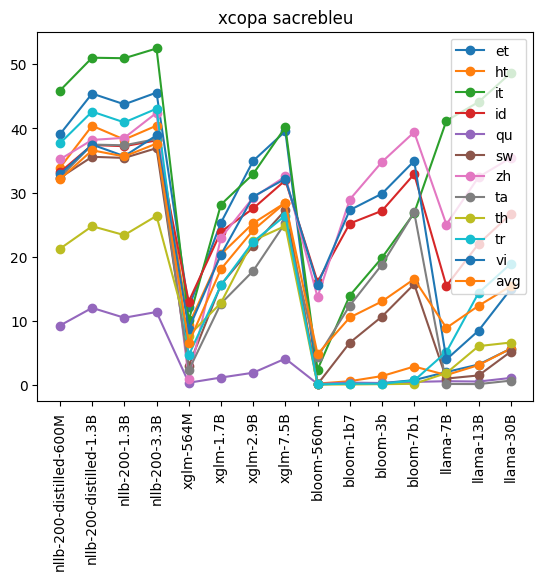

,de,es,fr,ja,ko,zh,avg
nllb-200-distilled-600M,59.41,64.80,61.18,33.09,38.52,36.94,48.99
nllb-200-distilled-1.3B,60.52,65.56,62.66,37.53,41.48,40.08,51.30
nllb-200-1.3B,60.66,65.72,62.52,36.80,40.77,38.89,50.89
nllb-200-3.3B,61.19,66.02,62.91,38.12,41.97,41.21,51.90
xglm-564M,30.41,31.70,34.00,2.89,5.64,3.42,18.01
xglm-1.7B,44.35,47.33,43.03,9.13,14.64,11.34,28.30
xglm-2.9B,48.69,51.59,48.39,14.21,19.19,16.79,33.14
xglm-7.5B,51.22,54.58,53.12,18.27,24.89,20.09,37.03
bloom-560m,15.95,33.98,34.67,2.79,1.06,8.69,16.19
bloom-1b7,32.25,50.68,49.56,7.38,5.61,17.85,27.22


\begin{tabular}{lrrrrrrr}
\toprule
{} &     de &     es &     fr &     ja &     ko &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  59.41 &  64.80 &  61.18 &  33.09 &  38.52 &  36.94 &  48.99 \\
nllb-200-distilled-1.3B &  60.52 &  65.56 &  62.66 &  37.53 &  41.48 &  40.08 &  51.30 \\
nllb-200-1.3B           &  60.66 &  65.72 &  62.52 &  36.80 &  40.77 &  38.89 &  50.89 \\
nllb-200-3.3B           &  61.19 &  66.02 &  62.91 &  38.12 &  41.97 &  41.21 &  51.90 \\
xglm-564M               &  30.41 &  31.70 &  34.00 &   2.89 &   5.64 &   3.42 &  18.01 \\
xglm-1.7B               &  44.35 &  47.33 &  43.03 &   9.13 &  14.64 &  11.34 &  28.30 \\
xglm-2.9B               &  48.69 &  51.59 &  48.39 &  14.21 &  19.19 &  16.79 &  33.14 \\
xglm-7.5B               &  51.22 &  54.58 &  53.12 &  18.27 &  24.89 &  20.09 &  37.03 \\
bloom-560m              &  15.95 &  33.98 &  34.67 &   2.79 &   1.06 &   8.69 &  16.19 \\
bloom-1b7               &  32.25 &  50.68 &  49.56 &   7.38 &   5.61 &  17.85

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


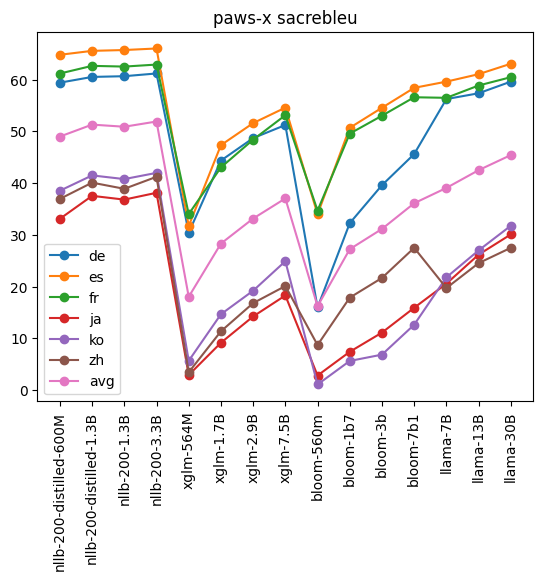

,ar,bg,de,el,es,fr,hi,ru,sw,th,tr,ur,vi,zh,avg
nllb-200-distilled-600M,59.46,62.89,65.10,65.44,70.24,65.53,59.98,54.59,54.58,51.27,59.16,53.17,60.37,51.81,59.54
nllb-200-distilled-1.3B,61.94,64.70,66.87,67.31,71.59,67.13,62.03,56.25,56.44,52.92,61.45,54.86,62.53,53.62,61.40
nllb-200-1.3B,61.52,64.72,66.73,67.25,71.66,67.10,61.75,56.39,56.49,52.70,61.41,54.50,62.23,53.45,61.28
nllb-200-3.3B,62.89,65.75,67.51,68.49,72.37,67.99,63.04,57.21,57.59,54.05,62.58,55.72,63.67,55.06,62.42
xglm-564M,21.33,39.69,41.30,31.27,39.31,44.14,23.98,32.95,19.16,24.02,22.24,21.85,27.41,7.71,28.31
xglm-1.7B,36.39,50.25,52.45,52.68,54.84,53.77,32.69,42.04,37.10,37.02,33.83,28.97,42.66,33.49,42.01
xglm-2.9B,40.91,54.47,56.80,57.11,58.95,57.09,39.73,46.18,41.89,39.88,37.44,35.13,47.16,40.22,46.64
xglm-7.5B,48.33,57.78,60.35,60.38,63.28,60.81,44.64,49.57,47.11,45.32,43.59,40.09,51.02,43.55,51.13
bloom-1b7,43.64,19.71,38.22,17.65,60.03,59.01,38.38,29.35,29.06,15.13,16.11,30.99,48.44,40.55,34.73
bloom-3b,45.86,21.96,43.09,20.63,62.22,60.70,41.36,32.67,35.84,15.23,16.66,34.34,51.34,43.08,37.50


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &     ar &     bg &     de &     el &     es &     fr &     hi &     ru &     sw &     th &     tr &     ur &     vi &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  59.46 &  62.89 &  65.10 &  65.44 &  70.24 &  65.53 &  59.98 &  54.59 &  54.58 &  51.27 &  59.16 &  53.17 &  60.37 &  51.81 &  59.54 \\
nllb-200-distilled-1.3B &  61.94 &  64.70 &  66.87 &  67.31 &  71.59 &  67.13 &  62.03 &  56.25 &  56.44 &  52.92 &  61.45 &  54.86 &  62.53 &  53.62 &  61.40 \\
nllb-200-1.3B           &  61.52 &  64.72 &  66.73 &  67.25 &  71.66 &  67.10 &  61.75 &  56.39 &  56.49 &  52.70 &  61.41 &  54.50 &  62.23 &  53.45 &  61.28 \\
nllb-200-3.3B           &  62.89 &  65.75 &  67.51 &  68.49 &  72.37 &  67.99 &  63.04 &  57.21 &  57.59 &  54.05 &  62.58 &  55.72 &  63.67 &  55.06 &  62.42 \\
xglm-564M               &  21.33 &  39.69 &  41.30 &  31.27 &  39.31 &  44.14 &  23.98 &  32.95 &  19.16 &  24.02 &  22.24 &  21.85 &  27.41 &   7.71 &  28.31 

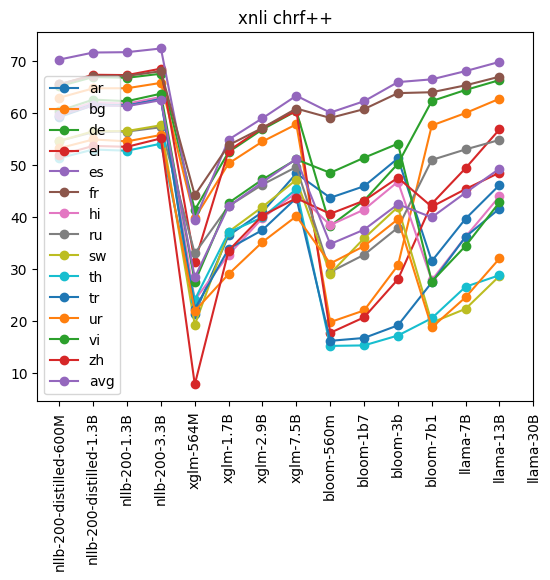

,ru,zh,es,ar,hi,id,te,sw,eu,my,avg
nllb-200-distilled-600M,60.71,52.35,66.45,66.58,64.69,59.30,51.02,60.70,56.01,45.29,58.31
nllb-200-distilled-1.3B,63.23,53.94,68.41,69.33,67.27,61.30,53.25,62.60,55.35,50.33,60.50
nllb-200-1.3B,62.62,54.23,68.20,69.36,66.91,61.34,52.64,62.68,56.32,51.85,60.62
nllb-200-3.3B,63.78,56.84,69.07,70.74,67.76,62.25,54.05,63.48,55.78,52.15,61.59
xglm-564M,37.58,5.84,35.29,23.41,26.96,39.19,12.81,18.49,20.68,11.19,23.14
xglm-1.7B,46.71,35.65,51.40,40.50,35.47,48.24,29.82,42.14,33.29,27.28,39.05
xglm-2.9B,51.09,43.25,56.92,46.23,46.03,51.63,32.16,48.26,42.13,33.27,45.10
xglm-7.5B,55.39,47.54,60.94,53.40,51.75,55.11,39.32,53.84,46.13,38.42,50.18
bloom-560m,14.75,31.17,42.73,35.62,33.61,42.13,18.70,12.01,19.06,13.43,26.32
bloom-1b7,29.12,43.91,56.56,46.50,41.58,50.00,29.31,32.56,32.69,14.07,37.63


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     ru &     zh &     es &     ar &     hi &     id &     te &     sw &     eu &     my &    avg \\
\midrule
nllb-200-distilled-600M &  60.71 &  52.35 &  66.45 &  66.58 &  64.69 &  59.30 &  51.02 &  60.70 &  56.01 &  45.29 &  58.31 \\
nllb-200-distilled-1.3B &  63.23 &  53.94 &  68.41 &  69.33 &  67.27 &  61.30 &  53.25 &  62.60 &  55.35 &  50.33 &  60.50 \\
nllb-200-1.3B           &  62.62 &  54.23 &  68.20 &  69.36 &  66.91 &  61.34 &  52.64 &  62.68 &  56.32 &  51.85 &  60.62 \\
nllb-200-3.3B           &  63.78 &  56.84 &  69.07 &  70.74 &  67.76 &  62.25 &  54.05 &  63.48 &  55.78 &  52.15 &  61.59 \\
xglm-564M               &  37.58 &   5.84 &  35.29 &  23.41 &  26.96 &  39.19 &  12.81 &  18.49 &  20.68 &  11.19 &  23.14 \\
xglm-1.7B               &  46.71 &  35.65 &  51.40 &  40.50 &  35.47 &  48.24 &  29.82 &  42.14 &  33.29 &  27.28 &  39.05 \\
xglm-2.9B               &  51.09 &  43.25 &  56.92 &  46.23 &  46.03 &  51.63 &  32.16 &  4

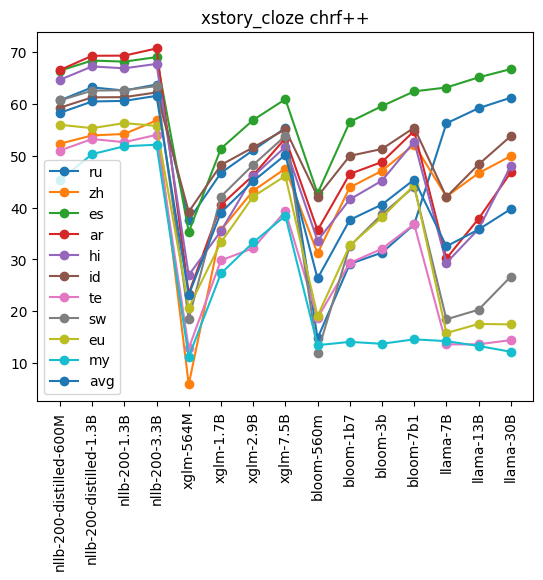

,es,fr,de,ru,zh,ja,th,sw,bn,te,avg
nllb-200-distilled-600M,65.28,56.20,64.09,53.35,50.33,39.91,41.05,53.23,49.05,54.23,52.67
nllb-200-distilled-1.3B,72.67,63.92,71.20,64.20,53.84,51.23,42.62,63.44,59.85,60.20,60.32
nllb-200-1.3B,71.81,63.19,69.71,61.71,55.52,56.00,43.42,64.11,59.04,57.68,60.22
nllb-200-3.3B,73.27,63.83,70.87,64.20,58.56,57.22,48.94,66.94,61.27,62.22,62.73
xglm-564M,30.48,29.80,34.81,19.09,12.16,10.09,11.64,11.25,8.01,4.20,17.15
xglm-1.7B,55.27,45.01,53.41,42.61,26.34,23.19,29.61,35.26,16.38,21.38,34.85
xglm-2.9B,62.54,53.42,60.24,53.25,32.05,36.18,30.92,44.59,27.76,25.74,42.67
xglm-7.5B,62.34,54.52,60.77,55.41,43.07,42.18,40.85,50.84,40.47,40.31,49.08
bloom-560m,36.79,31.83,18.90,10.79,25.07,12.26,12.41,10.74,22.52,14.20,19.55
bloom-1b7,46.89,45.78,38.96,23.78,36.44,22.67,7.76,21.71,26.77,23.23,29.40


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     es &     fr &     de &     ru &     zh &     ja &     th &     sw &     bn &     te &    avg \\
\midrule
nllb-200-distilled-600M &  65.28 &  56.20 &  64.09 &  53.35 &  50.33 &  39.91 &  41.05 &  53.23 &  49.05 &  54.23 &  52.67 \\
nllb-200-distilled-1.3B &  72.67 &  63.92 &  71.20 &  64.20 &  53.84 &  51.23 &  42.62 &  63.44 &  59.85 &  60.20 &  60.32 \\
nllb-200-1.3B           &  71.81 &  63.19 &  69.71 &  61.71 &  55.52 &  56.00 &  43.42 &  64.11 &  59.04 &  57.68 &  60.22 \\
nllb-200-3.3B           &  73.27 &  63.83 &  70.87 &  64.20 &  58.56 &  57.22 &  48.94 &  66.94 &  61.27 &  62.22 &  62.73 \\
xglm-564M               &  30.48 &  29.80 &  34.81 &  19.09 &  12.16 &  10.09 &  11.64 &  11.25 &   8.01 &   4.20 &  17.15 \\
xglm-1.7B               &  55.27 &  45.01 &  53.41 &  42.61 &  26.34 &  23.19 &  29.61 &  35.26 &  16.38 &  21.38 &  34.85 \\
xglm-2.9B               &  62.54 &  53.42 &  60.24 &  53.25 &  32.05 &  36.18 &  30.92 &  4

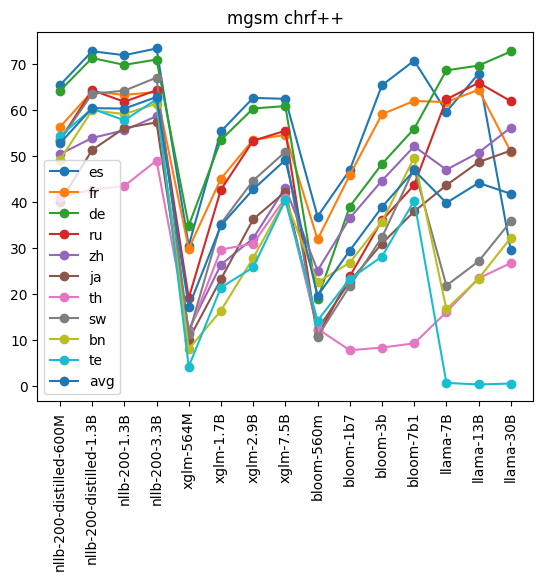

,et,ht,it,id,qu,sw,zh,ta,th,tr,vi,avg
nllb-200-distilled-600M,58.51,54.26,65.29,56.14,28.93,53.21,56.98,54.33,41.54,56.83,53.67,52.70
nllb-200-distilled-1.3B,63.39,59.51,69.39,59.69,31.25,56.23,61.61,59.05,45.13,60.45,57.24,56.63
nllb-200-1.3B,61.68,57.63,68.61,59.13,29.25,55.51,59.96,58.27,43.68,59.04,55.58,55.30
nllb-200-3.3B,63.76,59.25,70.04,60.53,30.87,57.02,63.10,59.92,46.69,61.27,58.79,57.39
xglm-564M,31.75,29.81,31.92,35.40,10.60,15.72,2.54,21.89,29.66,23.06,30.99,23.94
xglm-1.7B,46.88,40.90,51.05,46.46,17.43,36.35,44.15,36.08,34.55,36.41,42.12,39.31
xglm-2.9B,54.13,46.55,56.32,51.62,19.31,43.60,51.55,43.85,44.67,43.04,50.86,45.95
xglm-7.5B,58.04,48.05,60.49,54.68,22.79,48.35,54.02,48.83,45.49,46.81,52.69,49.11
bloom-560m,14.05,14.07,21.64,39.90,11.98,11.07,38.75,26.46,13.21,12.46,38.98,22.05
bloom-1b7,14.64,15.61,35.90,47.91,14.90,25.65,51.26,37.82,14.12,14.77,48.55,29.19


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     et &     ht &     it &     id &     qu &     sw &     zh &     ta &     th &     tr &     vi &    avg \\
\midrule
nllb-200-distilled-600M &  58.51 &  54.26 &  65.29 &  56.14 &  28.93 &  53.21 &  56.98 &  54.33 &  41.54 &  56.83 &  53.67 &  52.70 \\
nllb-200-distilled-1.3B &  63.39 &  59.51 &  69.39 &  59.69 &  31.25 &  56.23 &  61.61 &  59.05 &  45.13 &  60.45 &  57.24 &  56.63 \\
nllb-200-1.3B           &  61.68 &  57.63 &  68.61 &  59.13 &  29.25 &  55.51 &  59.96 &  58.27 &  43.68 &  59.04 &  55.58 &  55.30 \\
nllb-200-3.3B           &  63.76 &  59.25 &  70.04 &  60.53 &  30.87 &  57.02 &  63.10 &  59.92 &  46.69 &  61.27 &  58.79 &  57.39 \\
xglm-564M               &  31.75 &  29.81 &  31.92 &  35.40 &  10.60 &  15.72 &   2.54 &  21.89 &  29.66 &  23.06 &  30.99 &  23.94 \\
xglm-1.7B               &  46.88 &  40.90 &  51.05 &  46.46 &  17.43 &  36.35 &  44.15 &  36.08 &  34.55 &  36.41 &  42.12 &  39.31 \\
xglm-2.9B               &  

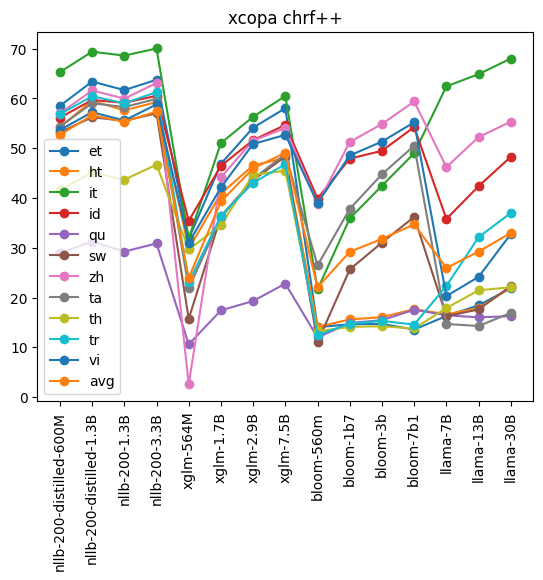

,de,es,fr,ja,ko,zh,avg
nllb-200-distilled-600M,77.36,80.29,78.32,58.02,61.97,60.89,69.48
nllb-200-distilled-1.3B,77.92,80.83,79.13,61.72,64.25,63.47,71.22
nllb-200-1.3B,78.15,81.00,79.19,61.17,63.66,62.62,70.96
nllb-200-3.3B,78.48,81.32,79.59,62.16,64.90,64.41,71.81
xglm-564M,50.99,51.85,55.53,15.62,21.61,14.65,35.04
xglm-1.7B,64.37,66.68,64.87,28.03,36.21,31.32,48.58
xglm-2.9B,67.94,70.37,69.10,36.06,42.09,38.97,54.09
xglm-7.5B,70.55,72.78,72.22,41.60,49.05,43.33,58.25
bloom-560m,35.61,53.53,55.36,18.23,11.72,28.26,33.78
bloom-1b7,53.45,69.40,69.23,26.70,21.23,41.12,46.85


\begin{tabular}{lrrrrrrr}
\toprule
{} &     de &     es &     fr &     ja &     ko &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  77.36 &  80.29 &  78.32 &  58.02 &  61.97 &  60.89 &  69.48 \\
nllb-200-distilled-1.3B &  77.92 &  80.83 &  79.13 &  61.72 &  64.25 &  63.47 &  71.22 \\
nllb-200-1.3B           &  78.15 &  81.00 &  79.19 &  61.17 &  63.66 &  62.62 &  70.96 \\
nllb-200-3.3B           &  78.48 &  81.32 &  79.59 &  62.16 &  64.90 &  64.41 &  71.81 \\
xglm-564M               &  50.99 &  51.85 &  55.53 &  15.62 &  21.61 &  14.65 &  35.04 \\
xglm-1.7B               &  64.37 &  66.68 &  64.87 &  28.03 &  36.21 &  31.32 &  48.58 \\
xglm-2.9B               &  67.94 &  70.37 &  69.10 &  36.06 &  42.09 &  38.97 &  54.09 \\
xglm-7.5B               &  70.55 &  72.78 &  72.22 &  41.60 &  49.05 &  43.33 &  58.25 \\
bloom-560m              &  35.61 &  53.53 &  55.36 &  18.23 &  11.72 &  28.26 &  33.78 \\
bloom-1b7               &  53.45 &  69.40 &  69.23 &  26.70 &  21.23 &  41.12

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


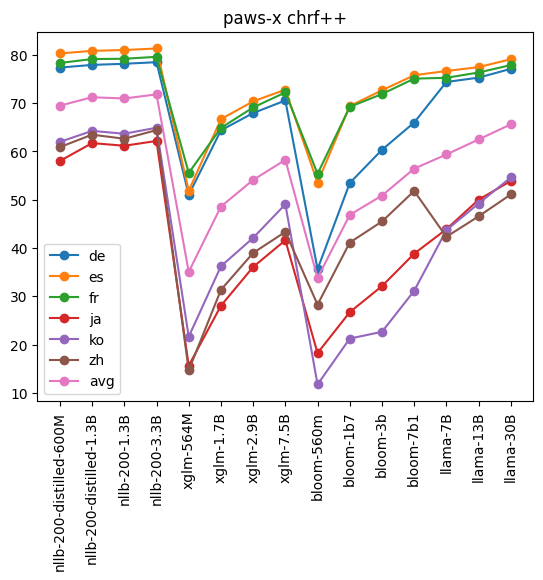

,ar,bg,de,el,es,fr,hi,ru,sw,th,tr,ur,vi,zh,avg
nllb-200-distilled-600M,83.91,86.05,87.17,87.14,88.19,87.09,85.53,82.75,80.69,82.53,85.94,80.09,85.02,82.64,84.62
nllb-200-distilled-1.3B,85.27,86.97,88.16,88.04,88.74,87.84,86.38,83.78,82.06,83.71,87.08,81.13,86.03,83.52,85.62
nllb-200-1.3B,84.92,86.91,88.00,88.02,88.73,87.82,86.22,83.66,81.82,83.37,86.92,81.06,85.84,83.63,85.49
nllb-200-3.3B,85.38,87.19,88.29,88.40,88.97,88.07,86.74,84.05,82.22,84.22,87.40,81.53,86.31,84.47,85.95
xglm-564M,60.80,73.87,73.76,71.82,72.89,74.99,64.73,69.33,57.49,65.94,62.75,60.62,65.27,52.02,66.16
xglm-1.7B,72.72,80.62,80.64,81.78,80.82,80.95,72.41,76.01,69.78,76.53,72.42,67.55,76.38,73.10,75.84
xglm-2.9B,75.17,82.24,83.02,83.77,82.63,82.55,77.06,78.67,73.39,77.61,75.16,71.51,79.16,77.66,78.54
xglm-7.5B,79.66,84.69,85.78,85.73,85.97,85.55,80.19,81.00,77.22,81.23,79.88,74.83,81.87,79.85,81.67
bloom-1b7,77.11,51.94,67.78,50.11,84.05,84.46,76.28,61.11,62.78,49.06,50.15,69.20,80.43,78.53,67.36
bloom-3b,79.00,53.83,72.10,52.79,85.41,85.44,78.44,65.10,68.50,48.98,49.89,71.53,82.09,80.02,69.51


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
{} &     ar &     bg &     de &     el &     es &     fr &     hi &     ru &     sw &     th &     tr &     ur &     vi &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  83.91 &  86.05 &  87.17 &  87.14 &  88.19 &  87.09 &  85.53 &  82.75 &  80.69 &  82.53 &  85.94 &  80.09 &  85.02 &  82.64 &  84.62 \\
nllb-200-distilled-1.3B &  85.27 &  86.97 &  88.16 &  88.04 &  88.74 &  87.84 &  86.38 &  83.78 &  82.06 &  83.71 &  87.08 &  81.13 &  86.03 &  83.52 &  85.62 \\
nllb-200-1.3B           &  84.92 &  86.91 &  88.00 &  88.02 &  88.73 &  87.82 &  86.22 &  83.66 &  81.82 &  83.37 &  86.92 &  81.06 &  85.84 &  83.63 &  85.49 \\
nllb-200-3.3B           &  85.38 &  87.19 &  88.29 &  88.40 &  88.97 &  88.07 &  86.74 &  84.05 &  82.22 &  84.22 &  87.40 &  81.53 &  86.31 &  84.47 &  85.95 \\
xglm-564M               &  60.80 &  73.87 &  73.76 &  71.82 &  72.89 &  74.99 &  64.73 &  69.33 &  57.49 &  65.94 &  62.75 &  60.62 &  65.27 &  52.02 &  66.16 

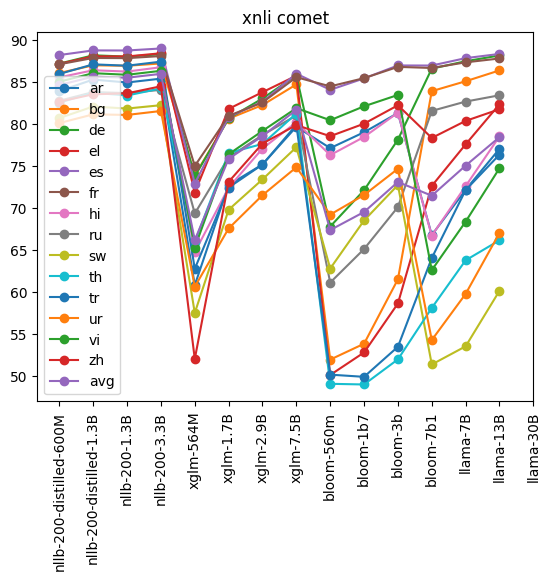

,ru,zh,es,ar,hi,id,te,sw,eu,my,avg
nllb-200-distilled-600M,87.07,85.00,89.36,88.39,90.52,88.08,86.44,86.04,86.87,81.35,86.91
nllb-200-distilled-1.3B,88.44,86.02,90.33,89.85,91.56,89.14,87.64,87.31,86.92,85.26,88.25
nllb-200-1.3B,88.18,86.36,90.22,89.83,91.39,89.05,87.30,87.21,87.25,85.99,88.28
nllb-200-3.3B,88.63,87.54,90.54,90.36,91.70,89.54,88.00,87.46,86.92,86.60,88.73
xglm-564M,73.05,54.47,72.08,61.44,68.85,77.52,57.04,58.63,59.52,50.99,63.36
xglm-1.7B,80.96,77.26,81.95,76.35,77.48,83.96,74.09,75.15,71.25,73.03,77.15
xglm-2.9B,83.36,82.11,85.61,79.84,82.99,85.66,75.43,79.71,79.32,77.47,81.15
xglm-7.5B,85.76,84.25,87.81,83.81,86.25,87.60,80.66,82.92,82.05,81.36,84.25
bloom-560m,43.20,70.47,73.65,72.18,73.40,79.31,58.06,42.03,55.73,47.25,61.53
bloom-1b7,60.47,82.81,85.44,80.40,81.05,85.06,72.48,66.06,71.98,50.69,73.64


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     ru &     zh &     es &     ar &     hi &     id &     te &     sw &     eu &     my &    avg \\
\midrule
nllb-200-distilled-600M &  87.07 &  85.00 &  89.36 &  88.39 &  90.52 &  88.08 &  86.44 &  86.04 &  86.87 &  81.35 &  86.91 \\
nllb-200-distilled-1.3B &  88.44 &  86.02 &  90.33 &  89.85 &  91.56 &  89.14 &  87.64 &  87.31 &  86.92 &  85.26 &  88.25 \\
nllb-200-1.3B           &  88.18 &  86.36 &  90.22 &  89.83 &  91.39 &  89.05 &  87.30 &  87.21 &  87.25 &  85.99 &  88.28 \\
nllb-200-3.3B           &  88.63 &  87.54 &  90.54 &  90.36 &  91.70 &  89.54 &  88.00 &  87.46 &  86.92 &  86.60 &  88.73 \\
xglm-564M               &  73.05 &  54.47 &  72.08 &  61.44 &  68.85 &  77.52 &  57.04 &  58.63 &  59.52 &  50.99 &  63.36 \\
xglm-1.7B               &  80.96 &  77.26 &  81.95 &  76.35 &  77.48 &  83.96 &  74.09 &  75.15 &  71.25 &  73.03 &  77.15 \\
xglm-2.9B               &  83.36 &  82.11 &  85.61 &  79.84 &  82.99 &  85.66 &  75.43 &  7

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


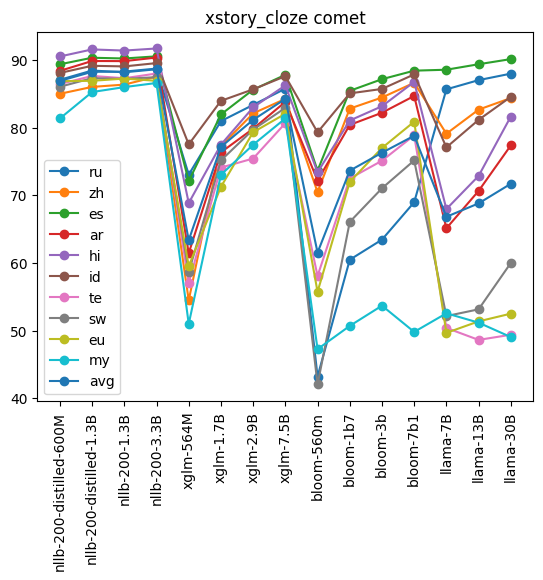

,es,fr,de,ru,zh,ja,th,sw,bn,te,avg
nllb-200-distilled-600M,83.35,81.43,83.48,78.24,79.93,77.46,75.73,77.38,82.09,83.17,80.23
nllb-200-distilled-1.3B,85.87,84.95,86.28,82.53,81.98,83.34,78.59,82.22,86.59,85.94,83.83
nllb-200-1.3B,85.47,84.44,85.72,81.47,82.34,84.20,78.43,82.18,86.18,84.72,83.52
nllb-200-3.3B,86.11,85.03,86.31,82.37,83.50,84.37,80.86,83.11,86.98,86.46,84.51
xglm-564M,61.85,63.52,66.69,58.59,52.41,50.28,52.25,45.19,49.66,46.16,54.66
xglm-1.7B,77.49,74.92,77.79,71.00,64.53,64.92,68.06,63.58,58.97,62.38,68.36
xglm-2.9B,81.03,79.37,81.37,77.40,69.27,74.94,70.80,71.23,65.38,64.14,73.49
xglm-7.5B,83.08,81.77,83.00,79.92,77.53,79.17,77.06,76.18,77.61,77.03,79.23
bloom-560m,64.35,64.33,42.94,34.70,61.24,40.60,32.91,37.54,56.54,47.12,48.23
bloom-1b7,71.25,74.20,64.94,51.54,72.33,59.10,41.21,52.78,68.19,61.26,61.68


\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &     es &     fr &     de &     ru &     zh &     ja &     th &     sw &     bn &     te &    avg \\
\midrule
nllb-200-distilled-600M &  83.35 &  81.43 &  83.48 &  78.24 &  79.93 &  77.46 &  75.73 &  77.38 &  82.09 &  83.17 &  80.23 \\
nllb-200-distilled-1.3B &  85.87 &  84.95 &  86.28 &  82.53 &  81.98 &  83.34 &  78.59 &  82.22 &  86.59 &  85.94 &  83.83 \\
nllb-200-1.3B           &  85.47 &  84.44 &  85.72 &  81.47 &  82.34 &  84.20 &  78.43 &  82.18 &  86.18 &  84.72 &  83.52 \\
nllb-200-3.3B           &  86.11 &  85.03 &  86.31 &  82.37 &  83.50 &  84.37 &  80.86 &  83.11 &  86.98 &  86.46 &  84.51 \\
xglm-564M               &  61.85 &  63.52 &  66.69 &  58.59 &  52.41 &  50.28 &  52.25 &  45.19 &  49.66 &  46.16 &  54.66 \\
xglm-1.7B               &  77.49 &  74.92 &  77.79 &  71.00 &  64.53 &  64.92 &  68.06 &  63.58 &  58.97 &  62.38 &  68.36 \\
xglm-2.9B               &  81.03 &  79.37 &  81.37 &  77.40 &  69.27 &  74.94 &  70.80 &  7

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


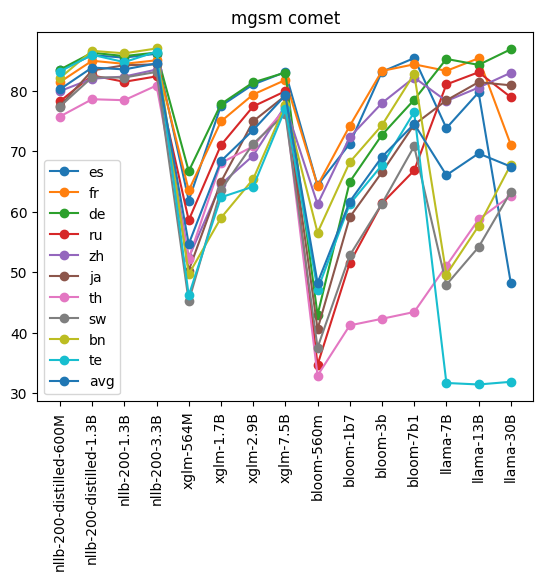

,et,ht,it,id,qu,sw,zh,ta,th,tr,vi,avg
nllb-200-distilled-600M,82.78,75.42,86.49,85.23,62.17,79.74,84.66,83.93,76.30,84.54,81.97,80.29
nllb-200-distilled-1.3B,86.57,78.88,88.95,87.44,64.26,82.01,87.07,86.50,78.79,86.97,84.29,82.88
nllb-200-1.3B,85.38,77.84,88.50,86.86,62.97,81.43,86.44,85.79,77.72,86.31,83.55,82.07
nllb-200-3.3B,86.76,79.16,89.16,87.56,63.87,82.08,87.85,86.60,80.10,87.42,85.23,83.25
xglm-564M,68.27,58.08,65.79,73.98,34.54,54.72,50.21,64.52,71.24,64.44,68.33,61.28
xglm-1.7B,78.78,67.84,79.09,81.47,50.98,69.01,80.06,77.22,77.88,74.84,77.87,74.09
xglm-2.9B,83.16,71.97,82.96,84.22,50.82,74.41,83.93,79.67,81.37,78.98,82.23,77.61
xglm-7.5B,85.49,72.47,85.19,86.04,55.33,77.29,85.41,83.47,82.36,81.38,83.61,79.82
bloom-560m,41.78,41.47,48.71,75.73,37.32,40.93,75.23,65.09,42.51,50.09,75.22,54.01
bloom-1b7,45.41,46.04,65.38,82.57,45.08,58.94,84.71,76.72,46.41,48.74,81.43,61.95


/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     et &     ht &     it &     id &     qu &     sw &     zh &     ta &     th &     tr &     vi &    avg \\
\midrule
nllb-200-distilled-600M &  82.78 &  75.42 &  86.49 &  85.23 &  62.17 &  79.74 &  84.66 &  83.93 &  76.30 &  84.54 &  81.97 &  80.29 \\
nllb-200-distilled-1.3B &  86.57 &  78.88 &  88.95 &  87.44 &  64.26 &  82.01 &  87.07 &  86.50 &  78.79 &  86.97 &  84.29 &  82.88 \\
nllb-200-1.3B           &  85.38 &  77.84 &  88.50 &  86.86 &  62.97 &  81.43 &  86.44 &  85.79 &  77.72 &  86.31 &  83.55 &  82.07 \\
nllb-200-3.3B           &  86.76 &  79.16 &  89.16 &  87.56 &  63.87 &  82.08 &  87.85 &  86.60 &  80.10 &  87.42 &  85.23 &  83.25 \\
xglm-564M               &  68.27 &  58.08 &  65.79 &  73.98 &  34.54 &  54.72 &  50.21 &  64.52 &  71.24 &  64.44 &  68.33 &  61.28 \\
xglm-1.7B               &  78.78 &  67.84 &  79.09 &  81.47 &  50.98 &  69.01 &  80.06 &  77.22 &  77.88 &  74.84 &  77.87 &  74.09 \\
xglm-2.9B               &  

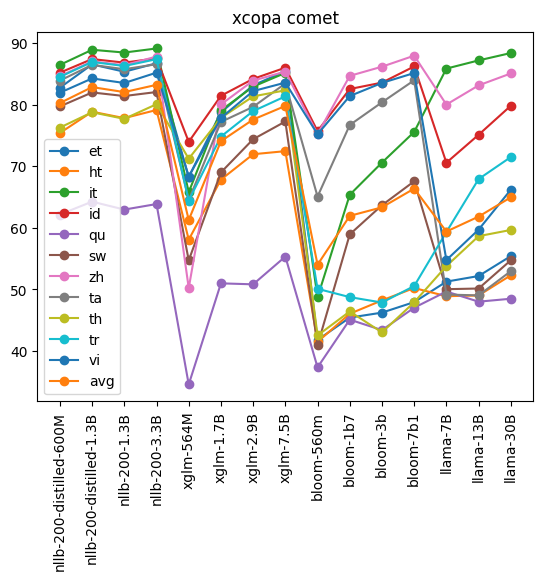

,de,es,fr,ja,ko,zh,avg
nllb-200-distilled-600M,87.06,87.60,87.31,82.93,84.59,82.73,85.37
nllb-200-distilled-1.3B,87.26,87.81,87.55,84.24,85.46,83.84,86.03
nllb-200-1.3B,87.33,87.87,87.59,84.19,85.15,83.58,85.95
nllb-200-3.3B,87.38,87.91,87.66,84.38,85.67,84.16,86.19
xglm-564M,74.77,74.42,76.62,55.72,61.30,53.28,66.02
xglm-1.7B,81.66,82.19,82.06,68.13,72.94,68.66,75.94
xglm-2.9B,83.38,83.78,83.72,73.40,76.78,74.16,79.20
xglm-7.5B,84.96,85.34,85.41,77.03,80.24,76.53,81.58
bloom-560m,60.17,74.43,76.62,49.91,38.58,63.76,60.58
bloom-1b7,74.49,83.75,84.28,63.20,51.49,75.14,72.06


\begin{tabular}{lrrrrrrr}
\toprule
{} &     de &     es &     fr &     ja &     ko &     zh &    avg \\
\midrule
nllb-200-distilled-600M &  87.06 &  87.60 &  87.31 &  82.93 &  84.59 &  82.73 &  85.37 \\
nllb-200-distilled-1.3B &  87.26 &  87.81 &  87.55 &  84.24 &  85.46 &  83.84 &  86.03 \\
nllb-200-1.3B           &  87.33 &  87.87 &  87.59 &  84.19 &  85.15 &  83.58 &  85.95 \\
nllb-200-3.3B           &  87.38 &  87.91 &  87.66 &  84.38 &  85.67 &  84.16 &  86.19 \\
xglm-564M               &  74.77 &  74.42 &  76.62 &  55.72 &  61.30 &  53.28 &  66.02 \\
xglm-1.7B               &  81.66 &  82.19 &  82.06 &  68.13 &  72.94 &  68.66 &  75.94 \\
xglm-2.9B               &  83.38 &  83.78 &  83.72 &  73.40 &  76.78 &  74.16 &  79.20 \\
xglm-7.5B               &  84.96 &  85.34 &  85.41 &  77.03 &  80.24 &  76.53 &  81.58 \\
bloom-560m              &  60.17 &  74.43 &  76.62 &  49.91 &  38.58 &  63.76 &  60.58 \\
bloom-1b7               &  74.49 &  83.75 &  84.28 &  63.20 &  51.49 &  75.14

/tmp/ipykernel_25844/7250691.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


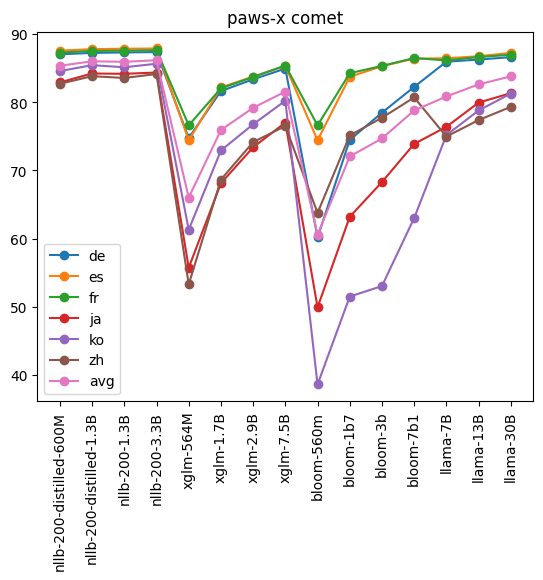

In [4]:
# create plots for each dataset and model

import matplotlib.pyplot as plt
import pandas as pd

for metric in ["sacrebleu", "chrf++", "comet"]:
    for dataset_name in metrics_dict_split[metric]:
        df = pd.DataFrame(metrics_dict_split[metric][dataset_name]).T
        display(df)
        print(df.to_latex())
        # x labels vertical
        df.plot(title=f"{dataset_name} {metric}", marker="o")
        plt.xticks(range(len(_MODELS)), _MODELS, rotation="vertical");
        plt.show()
